## 1. Vorbereitung

In [57]:
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importiere PCA
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline

import utils_pca

In [2]:
# Hilfsfunktion zum Visualisieren von Bildern in einem Raster
def plot_images(data, shape=(28, 28), grid=(4, 10), cmap="Greys"):
    fig, axes = plt.subplots(grid[0], grid[1], figsize=(10, 4))
    
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(data[i, :].reshape(*shape), cmap=cmap, interpolation="none")
        ax.axis("off")

### 1.1. Digits Datensatz

In [3]:
digits = load_digits()

### 1.2. Scikit-Learn PCA

Scikit-Learn's PCA hat folgende wichtige Funktionen:

- `fit()`
- `transform()`
- `inverse_transform()`


Nach dem Fit sind folgende Attribute relevant:
    
- `mean_`
- `components_`
- `explained_variance_`
- `explained_variance_ratio_`

## 2.1 PCA zur Dimensionsreduktion

Principal Component Analysis kann zur Reduktion der Anzahl der Features benutzt werden - ein Vorgang, der Dimensionsreduktion genannt wird. Das kann für alles Mögliche nützlich sein: zur Visualisierung der Daten, zur Kompression der Daten und damit auch zur Vorverarbeitung der Daten zum Beispiel für nachgeschaltetes überwachtes Modell.

Wichtig ist, dass die Dimensionsreduktion **keine Selektion der Features ist**. Es wird keine Auswahl getroffen. Stattdessen werden neue Features gelernt, die sich jeweils aus den ursprünglichen Features zusammensetzen aber dabei möglichst relevante Informationen darstellen. Im Falle der PCA setzen sich die neuen Features immer als sogenannte *Linearkombinationen* (ein Begriff der lineare Algebra) der ursprünglichen Features zusammen - das heißt gewichtete Summen der ursprünglichen Features.

Dimensionsreduktion ist ein völlig alltäglicher Vorgang und das menschliche Gehirn ist perfekt darin. Hier ein Beispiel: wenn wir zum Beispiel einen Hund auf einem Bild beschreiben, werden wir dies üblicherweise tun, indem wir bestimmte Eigenschaften des Hundes erwähnen - Farbe, Größe, Fell, Rasse usw. Keineswegs werden wir uns darauf beschränken, die Intensitäten der Pixel des Bildes einzeln aufzuzählen. Aber ganz genau so sieht bekanntlich ein überwachtes Modell das Bild. Die Information über Größe und Farbe des Hundes ergeben sich aber aus den zu Grunde liegenden Pixeln. In diesem Beispiel sind die Pixel die ursprünglichen Features. Die Eigenschaften Farbe, Größe, etc. sind das Ergebnis einer Dimensionsreduktion.

### 2.1.1 Kompression

Zum Einstieg beschäftigen wir uns damit, wie man die Information in Bildern komprimieren kann, indem man PCA benutzt. Wir beschäftigen uns hierzu nocheinmal mit dem Sign-MNIST Datensatz.

In [4]:
original_data = pd.read_csv("../data/sign_mnist_pca/sign_mnist_train.csv")
original_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [5]:
X_original = original_data.iloc[:, 1:].values
X_original.shape

(27455, 784)

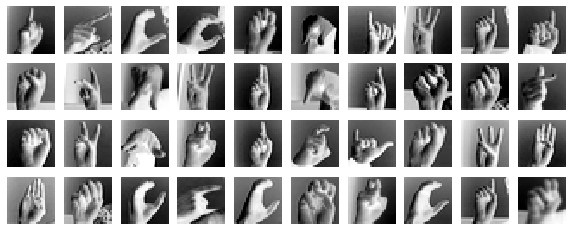

In [6]:
plot_images(X_original)

In [7]:
compressed_data = pd.read_csv("../data/sign_mnist_pca/sign_mnist_train_compressed.csv", index_col=0)
# compressed_data = pd.read_csv("/home/mathias/data/sign_mnist/sign_mnist_train_compressed_compressed.csv", index_col=0)
compressed_data

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,120.129147,-440.121393,-157.842855,159.137209,22.908585,-413.713936,11.498720,-271.329328,62.145003,-52.884644,...,29.914916,-13.969305,15.684740,13.166887,-23.406807,-5.451512,-39.875878,42.957991,-45.626975,-32.262993
1,330.220419,46.448575,208.193460,459.016750,-83.194270,-232.276524,-68.787235,175.115188,-7.681399,128.479986,...,-30.130791,-26.782976,13.675678,59.673599,27.151190,-0.853419,-28.115628,-61.919090,48.636006,-4.020672
2,-55.598157,-676.402492,573.603473,437.774559,-463.972884,54.383078,88.267973,353.172690,-253.960711,-226.499993,...,102.256666,-14.450904,-21.931358,-44.341053,14.819423,3.151373,23.776518,-31.325064,9.750719,-13.665379
3,-288.261152,-442.894037,746.297937,774.951138,266.012094,290.363832,-643.451465,443.478076,24.761890,-284.089582,...,105.247058,34.999528,77.110224,-9.077925,-18.375688,35.608718,-19.645063,13.289627,4.503459,8.352135
4,-242.989740,-63.177827,140.588984,-253.417363,275.988384,286.563787,6.629885,60.387740,96.708293,68.722559,...,30.620225,-31.548807,23.264529,-94.222617,22.561301,-55.393688,-27.334816,38.661507,150.399277,-12.634830
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,-76.671249,440.948654,-58.721381,405.240164,217.890162,411.906996,-442.208284,-68.628249,82.245800,88.468673,...,38.777415,-23.966632,-0.499146,-49.778920,-49.483013,-1.704557,77.361340,74.061872,-18.883417,-51.797472
27451,26.320810,-307.688899,138.910802,262.662239,222.079596,-301.414810,-245.704526,-137.124960,-165.507336,70.283126,...,1.238074,96.936540,-32.579801,-29.749171,31.778187,-13.923828,64.067453,1.272015,52.013069,-3.847817
27452,-178.732334,-245.577096,356.993628,-363.128658,-67.061162,334.081164,103.528418,-78.504603,138.413000,-87.561924,...,-57.611919,-21.708463,-10.934359,17.972056,-20.622795,39.470791,-1.655594,13.090148,-82.160274,-24.916713
27453,-735.097740,981.121089,-138.998571,402.441244,-207.108232,147.527643,-15.818802,272.455325,-87.475379,-7.622291,...,-19.697449,-36.348355,-18.867883,15.775842,-69.393706,-30.347215,-8.273949,11.630648,35.096084,103.607200


In [8]:
X_compressed = compressed_data.values
X_compressed.shape

(27455, 64)

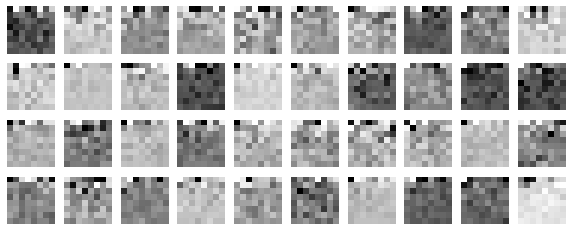

In [9]:
plot_images(X_compressed, shape=(8, 8))

In [10]:
X_original.shape

(27455, 784)

In [11]:
X_compressed.shape

(27455, 64)

In [12]:
compressor = np.loadtxt("../data/sign_mnist_pca/compressor.csv")
compressor.shape

(64, 784)

In [13]:
X_reconstructed = np.matmul(X_compressed, compressor)

In [14]:
X_reconstructed.shape

(27455, 784)

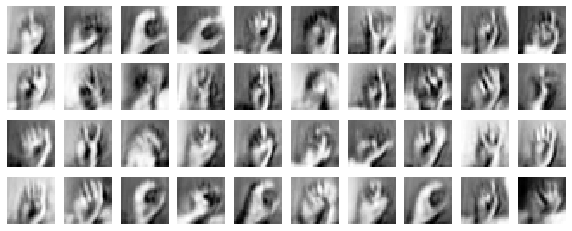

In [15]:
plot_images(X_reconstructed)

Wie ist die Kompression/Dekompression berechnet worden?

In [16]:
X_original.shape

(27455, 784)

In [17]:
X_compressed.shape

(27455, 64)

In [18]:
pca_compress = PCA(n_components=64)
pca_compress.fit(X_original)
X_compressed_2 = pca_compress.transform(X_original)

### 2.1.2 Visualisierung

Die Reduktion der Dimension kann Visualisierungen ermöglichen, die andernfalls nicht möglich wären. Eine Reduktion auf 2 oder 3 Dimensionen erlaubt zum Beispiel die Benutzung von Scatterplots.

In [19]:
digits = load_digits()

In [20]:
digits["data"].shape

(1797, 64)

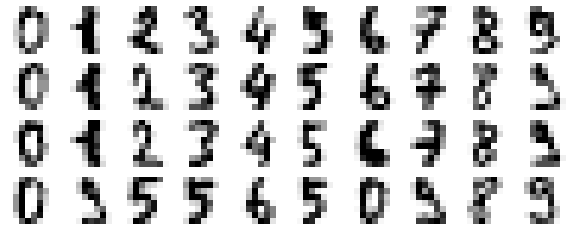

In [21]:
plot_images(digits["data"], shape=(8, 8))

In [22]:
X_digits = digits["data"]

# Modell instanziieren
pca_visual_2d = PCA(n_components=2)

# Modell anpassen (unsupervised!)
pca_visual_2d.fit(X_digits)

# Transformieren / Komprimieren / Dimensionsreduktion
X_transformed_2d = pca_visual_2d.transform(X_digits)

In [23]:
X_transformed_2d.shape

(1797, 2)

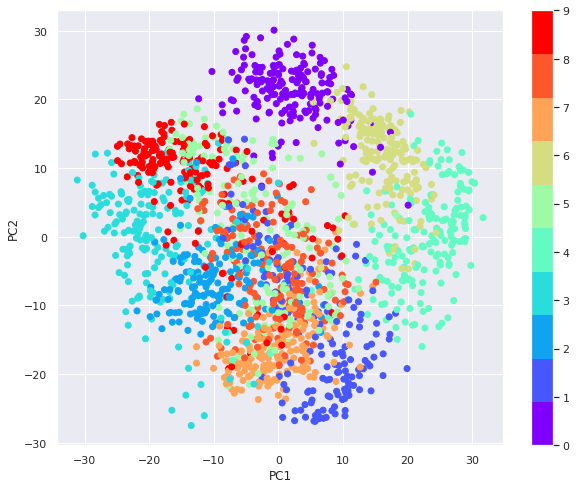

In [24]:
plt.figure(figsize=(10, 8))

plt.scatter(
    X_transformed_2d[:, 0],
    X_transformed_2d[:, 1],
    c=digits["target"],
    cmap=plt.get_cmap("rainbow", 10)
)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.colorbar()

In [25]:
# Modell instanziieren
pca_visual_3d = PCA(n_components=3)

# Modell anpassen (unsupervised!)
pca_visual_3d.fit(X_digits)

# Transformieren / Komprimieren / Dimensionsreduktion
X_transformed_3d = pca_visual_3d.transform(X_digits)

Text(0.5, 0, 'PC3')

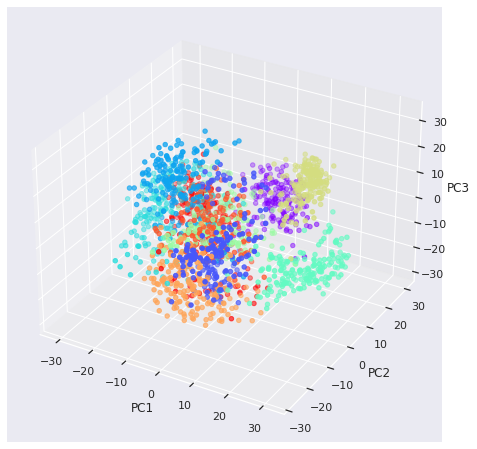

In [26]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection="3d")

scat = ax.scatter(
    X_transformed_3d[:, 0],
    X_transformed_3d[:, 1],
    X_transformed_3d[:, 2],
    c=digits["target"],
    cmap=plt.get_cmap("rainbow", 10)
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
# plt.colorbar()

Text(0.5, 0, 'PC3')

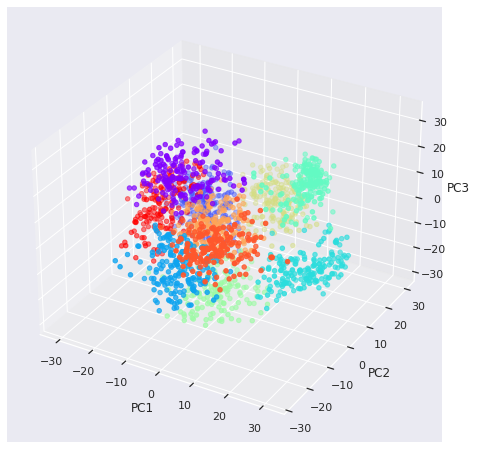

In [27]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10)
kmeans.fit(X_transformed_3d)

labels_kmeans = kmeans.labels_


fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection="3d")

scat = ax.scatter(
    X_transformed_3d[:, 0],
    X_transformed_3d[:, 1],
    X_transformed_3d[:, 2],
    c=labels_kmeans,
    cmap=plt.get_cmap("rainbow", 10)
)

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

#### Eigen-Images

Die gelernten Komponenten/Projektionsvektoren können als Bilder visualisiert werden.

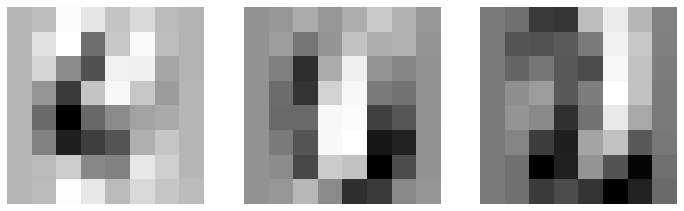

In [28]:
plt.close("all")
plt.figure(figsize=(12, 4))

for i in range(3):
    plt.subplot(1, 3, i+1)
    
    eigen_image = pca_visual_3d.components_[i, :].reshape(8, 8)
    
    plt.imshow(eigen_image, cmap="Greys")
    plt.axis("off")

### 2.1.3 Vorverarbeitung/Feature Engineering

Ein weit verbreitete praktische Anwendung von Dimensionsreduktion ist die Anwendung als Vorverarbeitung. Nachgeschaltete überwachte Modelle profitieren unter Umständen von einer Reduktion der Features - im Sinne von Laufzeit, Speicherplatz oder sogar Generalisierungsfähigkeit.

#### Trainings- und Testdaten

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_digits, digits["target"], train_size=0.8)

#### SVM + PCA

In [30]:
pca_preprocess = PCA(n_components=32)
pca_preprocess.fit(X_train)

X_train_preprocessed = pca_preprocess.transform(X_train)
X_test_preprocessed = pca_preprocess.transform(X_test)


svm1 = SVC(C=1.0, gamma="scale", kernel="rbf")
svm2 = SVC(C=1.0, gamma="scale", kernel="rbf")


svm1.fit(X_train, y_train)
y_pred_test1 = svm1.predict(X_test)

acc1 = accuracy_score(y_test, y_pred_test1)


svm2.fit(X_train_preprocessed, y_train)
y_pred_test2 = svm2.predict(X_test_preprocessed)

acc2 = accuracy_score(y_test, y_pred_test2)


print("Raw data: ", acc1)
print("Preprocessed data: ", acc2)

Raw data:  0.9944444444444445
Preprocessed data:  0.9972222222222222


#### Scree Plots

Die Auswahl der Anzahl der Komponenten geschieht durch sogenannte "Scree Plots", die die erklärte Varianz der einzelnen Komponenten aufzeigen (einmal als absolute Varianz und einmal als Anteil an der Gesamt-Varianz).

In [31]:
pca_scree = PCA()
pca_scree.fit(X_train)

X_train_scree = pca_scree.transform(X_train)

In [32]:
pca_scree.explained_variance_

array([1.78717481e+02, 1.64396922e+02, 1.38498112e+02, 1.00493036e+02,
       6.95444075e+01, 6.02903874e+01, 5.20769430e+01, 4.41177015e+01,
       3.97574841e+01, 3.66366171e+01, 2.85716376e+01, 2.66174424e+01,
       2.23125185e+01, 2.12032404e+01, 1.82451243e+01, 1.65468864e+01,
       1.57331372e+01, 1.49818787e+01, 1.21070801e+01, 1.11423337e+01,
       1.09316785e+01, 9.56104543e+00, 9.23973301e+00, 8.47097112e+00,
       8.24386807e+00, 7.30900653e+00, 7.05960455e+00, 6.32567317e+00,
       5.88560842e+00, 5.22345707e+00, 4.41494781e+00, 4.14231110e+00,
       4.10891681e+00, 3.77850823e+00, 3.72267603e+00, 3.39498470e+00,
       3.12024844e+00, 2.69331158e+00, 2.61477624e+00, 2.45102599e+00,
       2.27762067e+00, 1.93617645e+00, 1.87192566e+00, 1.69040241e+00,
       1.44161259e+00, 1.23486635e+00, 1.14599697e+00, 8.19629691e-01,
       6.95679840e-01, 5.04921224e-01, 1.90981307e-01, 9.59251433e-02,
       5.91777683e-02, 5.70872623e-02, 2.00422486e-02, 9.71104794e-03,
      

Text(0, 0.5, 'Explained Variance')

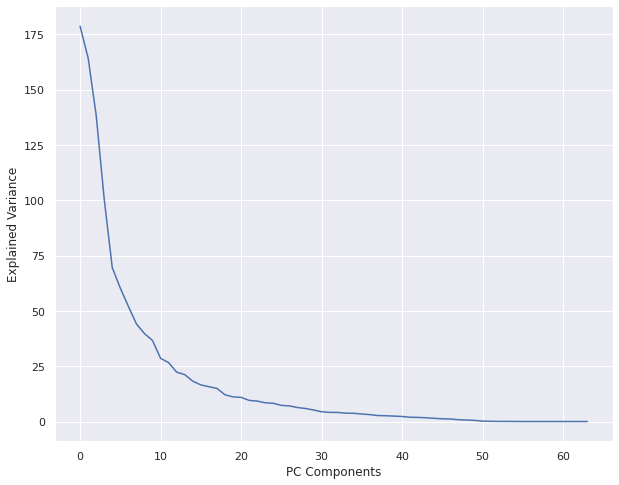

In [33]:
plt.figure(figsize=(10, 8))
plt.plot(pca_scree.explained_variance_)
plt.xlabel("PC Components")
plt.ylabel("Explained Variance")

In [34]:
pca_scree.explained_variance_ratio_

array([1.49087403e-01, 1.37141090e-01, 1.15536117e-01, 8.38320102e-02,
       5.80144430e-02, 5.02946731e-02, 4.34429589e-02, 3.68033026e-02,
       3.31659780e-02, 3.05625284e-02, 2.38346648e-02, 2.22044611e-02,
       1.86132627e-02, 1.76878950e-02, 1.52202134e-02, 1.38035312e-02,
       1.31246958e-02, 1.24979905e-02, 1.00998130e-02, 9.29501459e-03,
       9.11928450e-03, 7.97589259e-03, 7.70785147e-03, 7.06654479e-03,
       6.87709380e-03, 6.09722561e-03, 5.88917269e-03, 5.27692187e-03,
       4.90981671e-03, 4.35744531e-03, 3.68298109e-03, 3.45554559e-03,
       3.42768783e-03, 3.15205863e-03, 3.10548301e-03, 2.83212056e-03,
       2.60293360e-03, 2.24677981e-03, 2.18126507e-03, 2.04466344e-03,
       1.90000748e-03, 1.61517227e-03, 1.56157379e-03, 1.41014580e-03,
       1.20260355e-03, 1.03013436e-03, 9.55998884e-04, 6.83740960e-04,
       5.80341106e-04, 4.21208902e-04, 1.59317974e-04, 8.00214417e-05,
       4.93665182e-05, 4.76226031e-05, 1.67193873e-05, 8.10102575e-06,
      

Text(0, 0.5, 'Explained Variance Ratio')

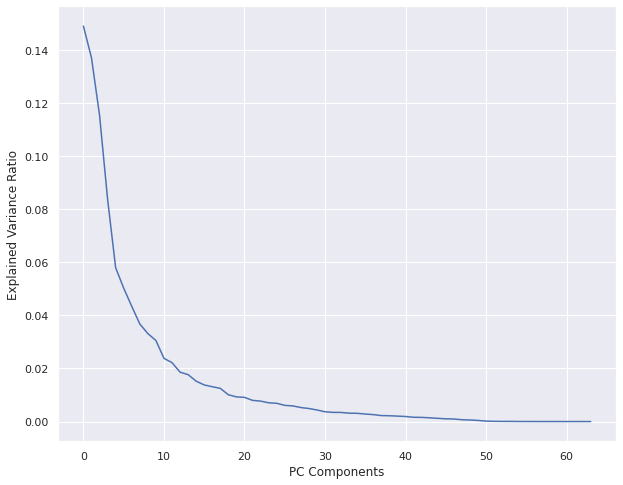

In [35]:
plt.close("all")
plt.figure(figsize=(10, 8))
plt.plot(pca_scree.explained_variance_ratio_)
plt.xlabel("PC Components")
plt.ylabel("Explained Variance Ratio")

Text(0, 0.5, 'Explained Variance')

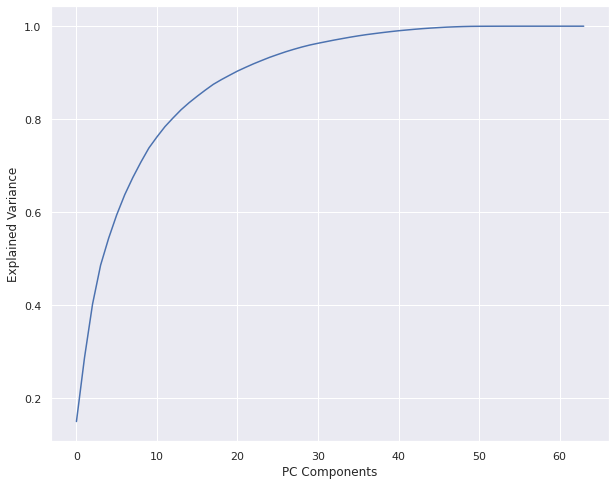

In [36]:
plt.figure(figsize=(10, 8))
plt.plot(
    np.cumsum(pca_scree.explained_variance_ratio_)  # Kumulative Summe zur "Berechnung" des "Integrals"
)
plt.xlabel("PC Components")
plt.ylabel("Explained Variance")

In [37]:
# Der Kompressionsgrad kann auch direkt spezifiziert werden
pca_auto = PCA(n_components=0.9)
pca_auto.fit(X_train)

X_train_auto_reduced = pca_auto.transform(X_train)
X_train_auto_reduced.shape

(1437, 21)

## 2.2 PCA für Noise Filtering

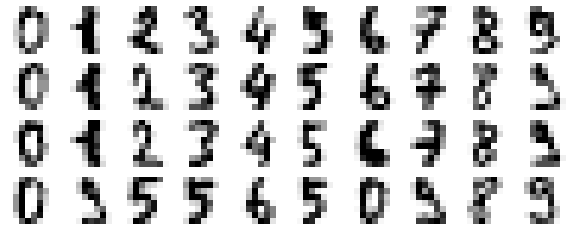

In [38]:
plot_images(X_digits, shape=(8, 8))

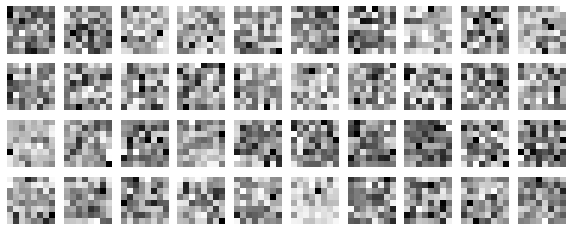

In [39]:
noise = np.random.normal(loc=0.0, scale=2.0, size=X_digits.shape)

plot_images(noise, shape=(8, 8))

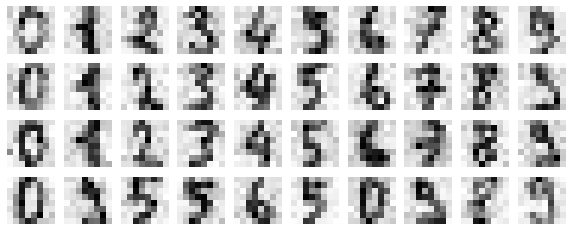

In [40]:
noisy_digits = X_digits + noise

plot_images(noisy_digits, shape=(8, 8))

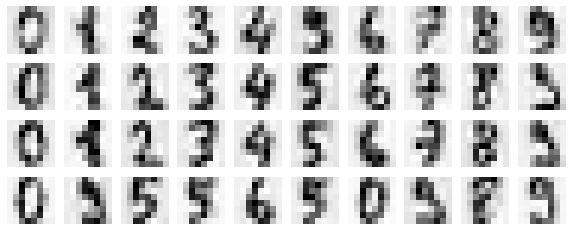

In [41]:
pca_denoise = PCA(n_components=0.8)

pca_denoise.fit(noisy_digits)

# Kompression
X_filtered = pca_denoise.transform(noisy_digits)

# Dekompression
X_reconstructed = pca_denoise.inverse_transform(X_filtered)

plot_images(X_reconstructed, shape=(8, 8))

## 2.3 Rekonstruktion Interaktiv

In [42]:
pca_reconstruct = PCA(n_components=8)
pca_reconstruct.fit(digits["data"] / 255.)

PCA(n_components=8)

In [43]:
example_image = digits["data"][0, :] / 255.
example_image

array([0.        , 0.        , 0.01960784, 0.05098039, 0.03529412,
       0.00392157, 0.        , 0.        , 0.        , 0.        ,
       0.05098039, 0.05882353, 0.03921569, 0.05882353, 0.01960784,
       0.        , 0.        , 0.01176471, 0.05882353, 0.00784314,
       0.        , 0.04313725, 0.03137255, 0.        , 0.        ,
       0.01568627, 0.04705882, 0.        , 0.        , 0.03137255,
       0.03137255, 0.        , 0.        , 0.01960784, 0.03137255,
       0.        , 0.        , 0.03529412, 0.03137255, 0.        ,
       0.        , 0.01568627, 0.04313725, 0.        , 0.00392157,
       0.04705882, 0.02745098, 0.        , 0.        , 0.00784314,
       0.05490196, 0.01960784, 0.03921569, 0.04705882, 0.        ,
       0.        , 0.        , 0.        , 0.02352941, 0.05098039,
       0.03921569, 0.        , 0.        , 0.        ])

In [44]:
pca_reconstruct.transform(example_image.reshape(1, -1))

array([[-0.00493903,  0.08343084, -0.03710995,  0.05103718, -0.0279574 ,
        -0.02918512,  0.0127944 ,  0.01010358]])

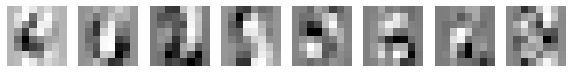

In [45]:
plot_images(pca_reconstruct.components_, shape=(8, 8), grid=(1, 8))

(-0.5, 7.5, 7.5, -0.5)

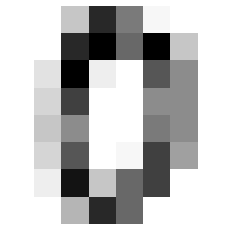

In [46]:
plt.close("all")
plt.imshow(example_image.reshape(8, 8), cmap="Greys")
plt.axis("off")

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='w0', max=1.0, min=1.0, read…

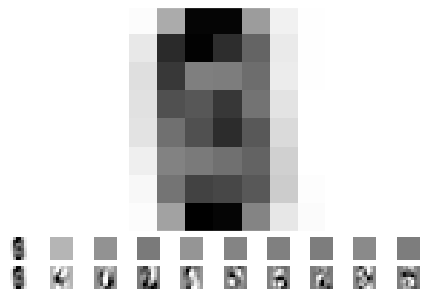

In [47]:
# requires 
# %matplotlib widget
fig, axes, interactive_plot = utils_pca.get_interactive_pca_images(digits["images"], n_components=9)
interactive_plot

## 2.4 PCA für Dekorrelation und Whitening

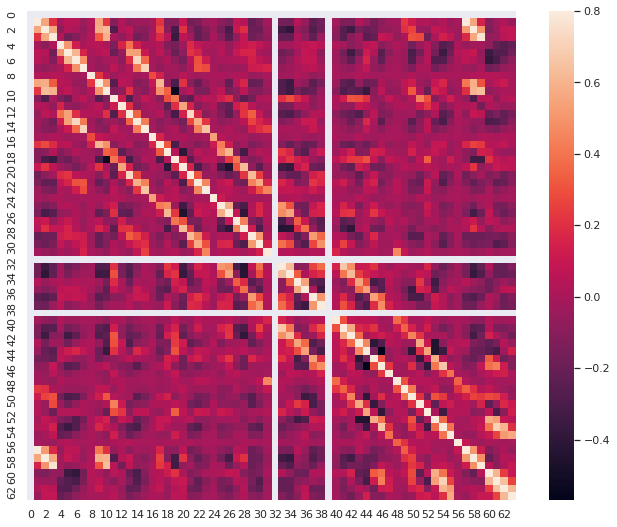

In [48]:
import seaborn as sns

df = pd.DataFrame(digits["data"])
corr = df.corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, vmax=.8, square=True);

In [49]:
pca_decorr = PCA()
pca_decorr.fit(digits["data"])

digits_decorr = pca_decorr.transform(digits["data"])
digits_decorr.shape

(1797, 64)

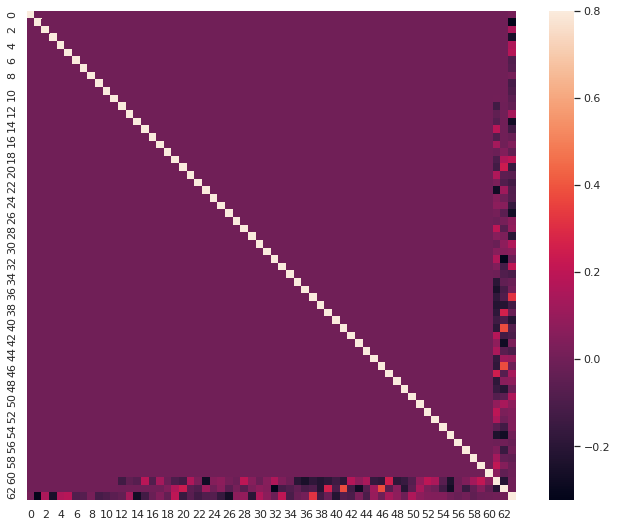

In [50]:
df2 = pd.DataFrame(digits_decorr)
corr2 = df2.corr()
fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr2, vmax=.8, square=True);

## 2.5 PCA Beispiel - Face Images

In [51]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(
    data_home="../data/",
    min_faces_per_person=40,
    color=False,
    resize=1.0
)

# print(faces["DESCR"])

faces.keys()

dict_keys(['data', 'images', 'target', 'target_names', 'DESCR'])

In [52]:
faces["target_names"]

array(['Ariel Sharon', 'Arnold Schwarzenegger', 'Colin Powell',
       'Donald Rumsfeld', 'George W Bush', 'Gerhard Schroeder',
       'Gloria Macapagal Arroyo', 'Hugo Chavez', 'Jacques Chirac',
       'Jean Chretien', 'Jennifer Capriati', 'John Ashcroft',
       'Junichiro Koizumi', 'Laura Bush', 'Lleyton Hewitt',
       'Luiz Inacio Lula da Silva', 'Serena Williams', 'Tony Blair',
       'Vladimir Putin'], dtype='<U25')

In [53]:
faces["images"].shape

(1867, 125, 94)

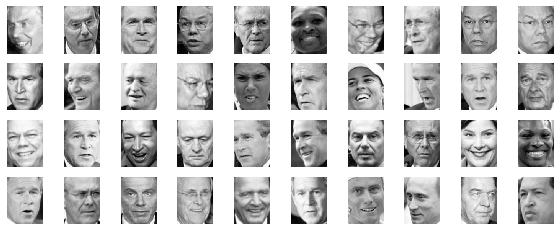

In [54]:
plot_images(faces["data"] / 255, shape=(125, 94), cmap="Greys_r")

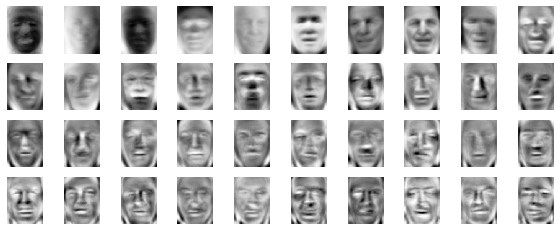

In [55]:
pca_faces = PCA(n_components=0.95)
pca_faces.fit(faces["data"])

plt.close("all")
plot_images(pca_faces.components_, shape=(125, 94), cmap="Greys_r")

In [58]:
# TODO: PCA + SVM Pipeline

X_train, X_test, y_train, y_test = train_test_split(faces["data"] / 255, faces["target"])

pca_faces = PCA(n_components=0.95)
svm = SVC(
    C=2.0,
    kernel="rbf",
    gamma="scale"
)

svm_pca_faces = make_pipeline(
    pca_faces,
    svm
)

svm_pca_faces.fit(X_train, y_train)

Pipeline(steps=[('pca', PCA(n_components=0.95)), ('svc', SVC(C=2.0))])

In [59]:
svm_pca_faces.score(X_train, y_train)

0.9892857142857143

In [60]:
svm_pca_faces.score(X_test, y_test)

0.7323340471092077